  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root me

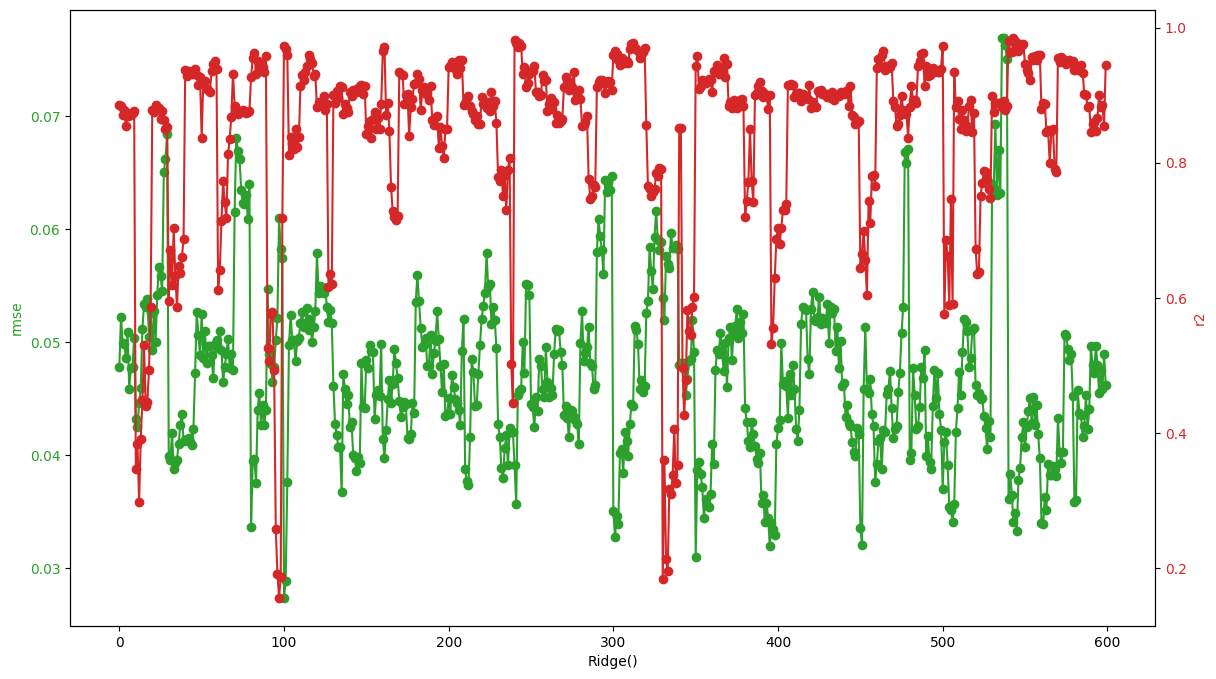

In [ ]:
#Multiple features
#Optimal Model
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import validation_curve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
Excel="stored.xlsx"
data=pd.read_excel(Excel, sheet_name='ALL01')
# Selecting features and target variable for the efficiency prediction model
X = data.drop(columns=['efficiency', 'Cost $US/kg', 'daily yield kg/d','Ta (mean)/K','Ta (max)/K','Ta(min)/K', 'Ig(mean)','Ig(max)','Ig(min)' ])#'Ta (mean)/K','Ta (max)/K','Ta(min)/K', 'Ig(mean)','Ig(max)','Ig(min)'
# Handling categorical data: Encoding categorical features
categorical_features = ['Type', 'Material']
numerical_features = X.drop(columns=categorical_features).columns
#y_column='daily yield kg/d'
# Creating a preprocessing pipeline for numerical and categorical data
y = data[['efficiency', 'Cost $US/kg', 'daily yield kg/d']]
preprocessor = ColumnTransformer(
transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

def float_range(start, stop, step):
    current = start
    while current < stop:
        yield current
        current += step
# Create a pipeline with preprocessing and regression model (reg, reg1, reg2 or reg3)
reg=LinearRegression()
reg1=RandomForestRegressor()
reg2= MultiOutputRegressor(SVR())
reg3=Ridge()
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", reg1)])
#LinearRegression
#Ridge Regression
#MultiOutputRegressor
#RandomForestRegressor
#GradientBoostingRegressor
#SVR


# liste initializaton
Ltest_size=[]
Lrandom_state=[]
Lrmse=[]
Lr2= []



for i in tqdm(range(0, 60, 1)):
    for j in (float_range(0.2, 0.3, 0.01)):



        # Splitting the dataset into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j, random_state=i)

        # Training the model
        pipeline.fit(X_train, y_train)

        # Predicting efficiency on the test set
        y_pred = pipeline.predict(X_test)

        # Evaluating the model
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        if (r2 > 0 and rmse > 0):
            Ltest_size.append(j)
            Lrandom_state.append(i)
            Lrmse.append(rmse)
            Lr2.append(r2)

# DataFrame from results
df= pd.DataFrame( {"test_size":Ltest_size, "random_state":Lrandom_state,"rmse":Lrmse, "r2":Lr2})
palette=sns.color_palette(None,len(y.columns)*2)
i=2


fig, ax1 = plt.subplots(figsize=(14, 8))


# Plotting efficiency and daily production with primary y-axis
ax1.set_xlabel(reg3)
ax1.set_ylabel('rmse', color=palette[i])
ax1.scatter(df.index, df['rmse'], color=palette[i], alpha=1, label='RMSE')
ax1.plot(df.index, df['rmse'], color=palette[i], alpha=1, label='RMSE')
ax1.tick_params(axis='y', labelcolor=palette[i])

# Create a twin Axes sharing the x-axis for the price
ax2 = ax1.twinx()
ax2.set_ylabel('r2', color=palette[i+1])
ax2.scatter(df.index, df['r2'], color=palette[i+1], label='R2')
ax2.plot(df.index, df['r2'], color=palette[i+1], label='R2')
ax2.tick_params(axis='y', labelcolor=palette[i+1])
#for i, txt in enumerate(df.index):
   # ax1.annotate(txt, (df.index[i], df['rmse'].iloc[i]), xytext=(5,-5), textcoords='offset points')
  #  ax2.annotate(txt, (df.index[i], df['r2'].iloc[i]), xytext=(5,-5), textcoords='offset points')

plt.show()

Using the optimal test_size and random state

In [ ]:
lr2=[]
lrmse=[]
ind=[]

new_df=df.assign(ecrt=abs(df["r2"]-df["rmse"]))
index_max = new_df["ecrt"].idxmax()

#print("test_size_optimal_"f'{feat}', df.iloc[index_max,0], "\n", "random_state_optimal"f'{feat}',df.iloc[index_max,1],"\n", "rmse_optimal"f'{feat}',df.iloc[index_max,2],"\n", "r2_optimal"f'{feat}',df.iloc[index_max,3])

ts= df.iloc[index_max,0]
rs=df.iloc[index_max,1]

# Sélect feature for ts and rs found
X = data.drop(columns=['efficiency', 'Cost $US/kg', 'daily yield kg/d','Ta (mean)/K','Ta (max)/K','Ta(min)/K', 'Ig(mean)','Ig(max)','Ig(min)'])# ,'Ta (mean)/K','Ta (max)/K','Ta(min)/K', 'Ig(mean)','Ig(max)','Ig(min)'
# Handling categorical data: Encoding categorical features
y = data[['efficiency', 'Cost $US/kg',  'daily yield kg/d']]
#y = data[feature]


# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

# Training the model
pipeline.fit(X_train, y_train)

# Predicting efficiency on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
#globals()[f"rmse_{feat}"]  = mean_squared_error(y_test, y_pred, squared=False)
#globals()[f"r2_{feat}"] = r2_score(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)
r2= r2_score(y_test, y_pred)

lr2.append(r2)
lrmse.append(rmse)
#ind.append(feature)
print('test_size=',ts)
print('random_state=',rs)
print('rmse=',rmse)
print('r2', r2)

test_size= 0.23000000000000004
random_state= 54
rmse= 0.03552283572002401
r2 0.9615705192093271


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross validation - GridsearchCV for RandomForest

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'regressor__max_samples': 50, 'regressor__n_estimators': 74, 'regressor__random_state': 20}
Best cross-validation score: 0.4015709011941196


3it [00:23,  7.83s/it]


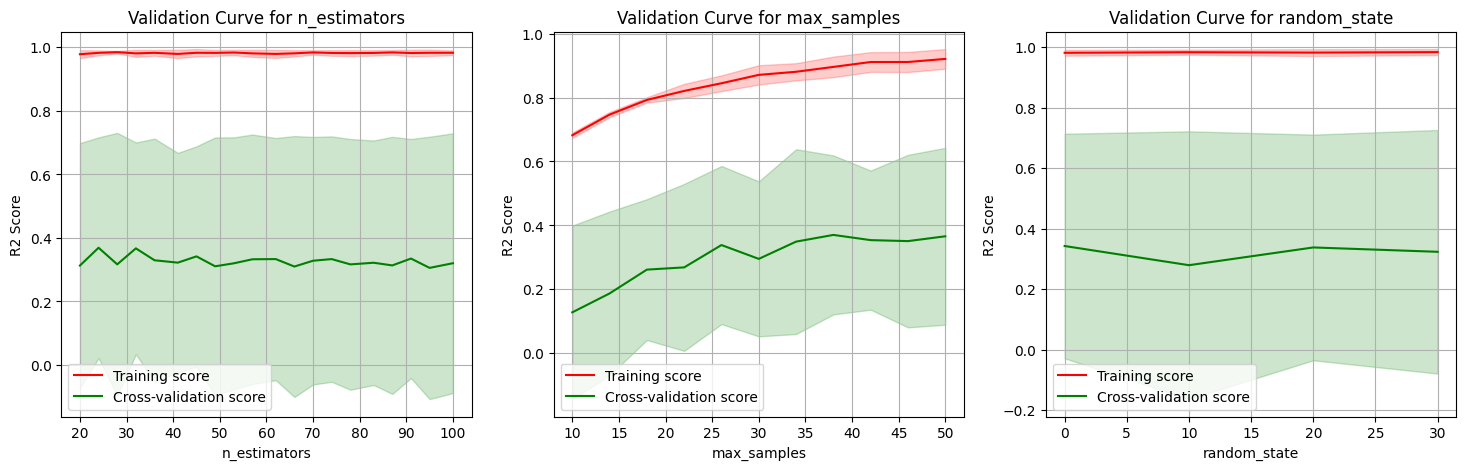

In [ ]:
Excel = "stored.xlsx"
data = pd.read_excel(Excel, sheet_name='ALL01')
X = data.drop(columns=['efficiency', 'Cost $US/kg', 'daily yield kg/d',
                       'Ta (mean)/K', 'Ta (max)/K', 'Ta(min)/K', 'Ig(mean)', 'Ig(max)', 'Ig(min)'])
y = data[['efficiency', 'Cost $US/kg', 'daily yield kg/d']]

categorical_features = ['Type', 'Material']
numerical_features = X.drop(columns=categorical_features).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", RandomForestRegressor())])
param_grid = {
    'regressor__n_estimators':  [int(x) for x in np.linspace(start = 20, stop = 100, num = 20)],
    'regressor__max_samples': [int(x) for x in np.linspace(10, 50, num = 11)],
    'regressor__random_state': list(range(0,40,10))
}
param_range = param_grid

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (param_name, param_range) in tqdm(zip(axes, param_range.items())):
    train_scores, test_scores = validation_curve(
        pipeline, X, y, param_name=param_name, param_range=param_range,
        scoring="r2", n_jobs=-1, cv=5
    )

    # Calculate mean and standard deviation for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot validation curve
    ax.plot(param_range, train_mean, label="Training score", color="r")
    ax.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
    ax.plot(param_range, test_mean, label="Cross-validation score", color="g")
    ax.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)
    ax.set_title(f"Validation Curve for {param_name.split('__')[-1]}")
    ax.set_xlabel(param_name.split('__')[-1])
    ax.set_ylabel("R2 Score")
    ax.legend(loc="best")
    ax.grid()

Comparing Models

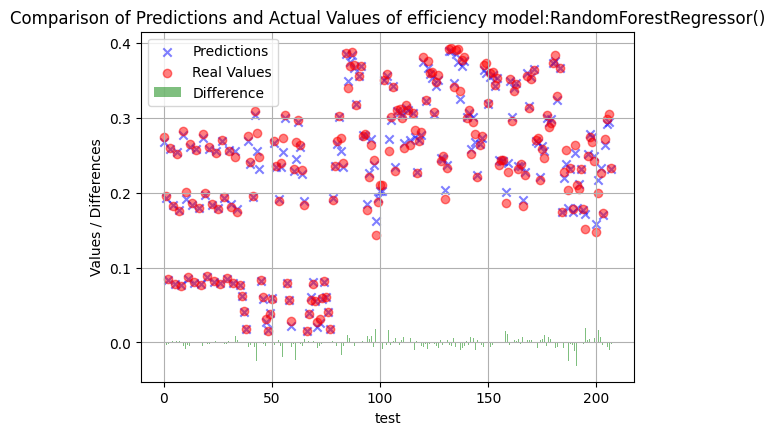

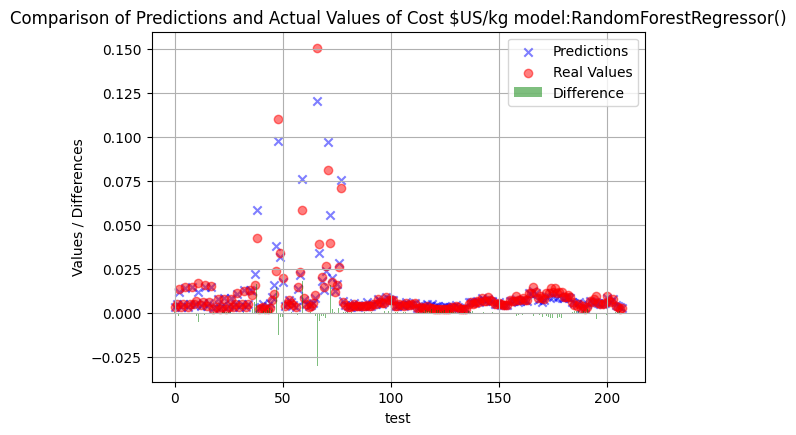

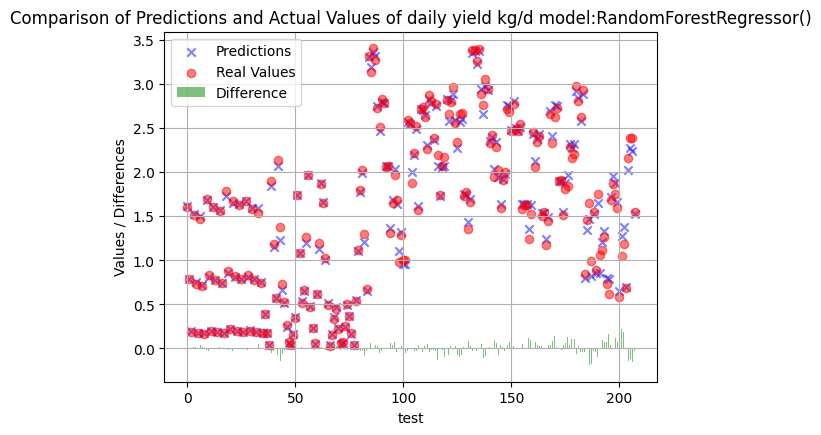

In [ ]:
y_pred = pipeline.predict(X)
for i in range (1,4,1):
    plt.figure(figsize=(14, 10))  # Adjust graph size
    plt.subplot(2,2,i)

# Predicted values
    plt.scatter(X.index, y_pred[:, i-1], color='blue', alpha=0.5, label='Predictions', marker='x')

# Actual values
    plt.scatter(X.index, y.iloc[:,i-1], color='red', alpha=0.5, label='Real Values', marker='o')

    # Adding details
    plt.title(f'Comparison of Predictions and Actual Values of {y_test.columns[i-1]} model:{reg1}')
              # Title
    plt.xlabel('test')  # X-axis Label
    plt.ylabel('Value')  # Y-axis Label
    plt.legend()  # Legend
    plt.grid(True)  # Grid
    differences = y_pred[:, i-1] - y.iloc[:, i-1].values

    # Differences
    plt.bar(X.index, differences, width=0.4, label='Difference', color='green', alpha=0.5)

    #plt.title('Predictions, Actual Values, and Their Differences')
    plt.xlabel('test')
    plt.ylabel('Values / Differences')
    plt.legend()
    plt.grid(True)
    plt.show()



Testing the model

model= RandomForestRegressor()
Model performances 
 R2= 0.9615705192093271 
 RMSE= 0.03552283572002401
Weather data are:                     
Max Ig    980.000000
Max Ta     28.000000
Min Ig    150.000000
Min Ta     23.000000
Mean Ig   613.600000
Mean Ta    25.900000
Wind       14.600000
Pressure    0.101325
Enter the solar still type (e.g., 'Inclined SS WB' for Inclined Solar Still Without Baffles): cascade SS Baff
Enter the material configuration (e.g., Glass-Aluminium-Wood): Glass-Aluminium-Wood
Enter the number of stairs (put 1 if there are no stairs): 8
Enter the inclination angle of the cover between 0 and 50°: 25
Enter the inclination angle of the stairs between 0 and 90° (0 for no stairs): 35
Enter the absorber surface in m2: 1.2


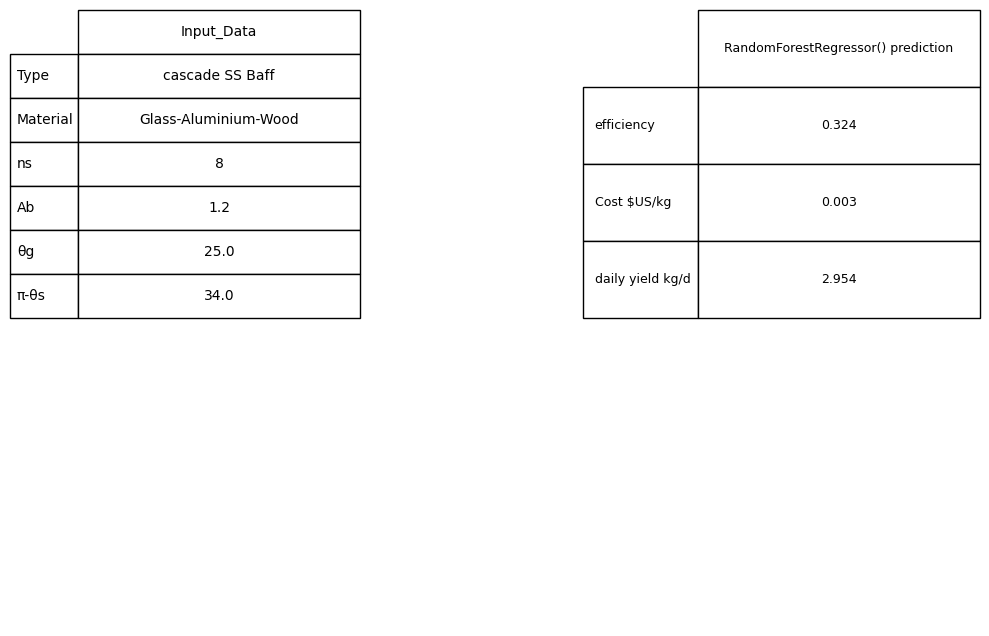

In [ ]:
#testing the model
print ("model=", reg1)
print("Model performances","\n","R2=",r2, "\n", "RMSE=", rmse)
Excel="cssb.xlsx"# excel path
we=pd.read_excel(Excel, sheet_name='Meteo')
lisT=[  max(we.Ig),max(we.Ta), min(we.Ig),min(we.Ta),np.mean(we.Ig).round(1), np.mean(we.Ta).round(1), np.mean(we.V).round(1),max(we.P)]
col=['Max Ig','Max Ta', 'Min Ig', 'Min Ta', 'Mean Ig','Mean Ta', 'Wind', 'Pressure']
weth=pd.DataFrame({" ": lisT}, index= col)
print("Weather data are:", weth)
Type = str(input("Enter the solar still type (e.g., 'Inclined SS WB' for Inclined Solar Still Without Baffles): "))
Mat = str(input("Enter the material configuration (e.g., Glass-Aluminium-Wood): "))
ns = int(input("Enter the number of stairs (put 1 if there are no stairs): "))
Tetag = int(input("Enter the inclination angle of the cover between 0 and 50°: "))
Tetas = int(input("Enter the inclination angle of the stairs between 0 and 90° (0 for no stairs): "))
Ab = float(input("Enter the absorber surface in m2: "))
X0=[Type,Mat,ns,Ab, round(np.pi*Tetag/180, 2),round(np.pi*Tetas/180,2)]
ind=["Type", "Material",  "ns", "Ab" , "θg" , "π-θs"]
X1=pd.DataFrame({k:v for k,v in enumerate(zip(ind,X0)) })
X2=X1.T
X2.index = ind
X2 = X2.drop(0, axis=1)
#print("your data is:", X2.T)
#print("Efficiency:" ,100*y_pred[0,0], "\n","Cost $US/kg :", y_pred[0,1], "\n","Cost $US/kg ", y_pred[0,2])
X2.iloc[4]=(X2.iloc[4]*180//np.pi)
X2.iloc[5]=(X2.iloc[5]*180//np.pi)

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.axis('off')
plt.table(cellText=X2.values,rowLabels=X2.index ,colLabels=["Input_Data"],loc='bottom',bbox=[0, 1, 1, 1], cellLoc='center')
y_pred = pipeline.predict(X2.T)

plt.subplot(1, 2,2)
plt.axis('off')
Y = pd.DataFrame(y_pred)
#y_pred[0,0]=100*y_pred[0,0]
Y=Y.T
plt.table(cellText=Y.values.round(3),colLabels=[str(reg1)+' '+'prediction'] ,rowLabels=y.columns,loc='center',bbox=[1, 1, 1, 1], cellLoc='center')